**Защита персональных данных клиентов**

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Содержание**

1. Подготовка всех систем к старту
- Загрузка необходимых библиотек
- Подгрузка датасета и его первичное изучение
- Вывод по первичному изучению данных
- Подготовка признаков и целевого признака, разделение данных
2.  Задача про умножение матриц
- Теоретическое обоснование
- Практическое доказательство правомерности ответа путем преобразования матриц
- Практическое доказательство на работе модели линейной регрессии
3.  Создание и проверка алгоритма зашифровки данных
- Формулирование алгоритма зашифровки признаков
- Обучение модели на исходных данных
- Преобразование выборки признаков согласно предложенному алгоритму
- Обучение модели на зашифрованной выборке
- Итоговая таблица
4. Вывод по проекту

# Подготовка всех систем к старту

## Загрузка необходимых библиотек 

In [1]:
# Для начала, как водится, загружаем библиотеки и инструментарий для обработки данных

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Подгрузка датасета и его первичное изучение

In [2]:
# Теперь загружаем исходный датасет в отдельную переменную и сразу же выводим его чаcть для визуального осмотра

df = pd.read_csv('insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
# Для более подробного ознакомления с данными вызовем методы для получения более обширных сведений об имеющемся наборе сведений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


c:\users\konst\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Пол'}>,
        <AxesSubplot:title={'center':'Возраст'}>],
       [<AxesSubplot:title={'center':'Зарплата'}>,
        <AxesSubplot:title={'center':'Члены семьи'}>],
       [<AxesSubplot:title={'center':'Страховые выплаты'}>,
        <AxesSubplot:>]], dtype=object)

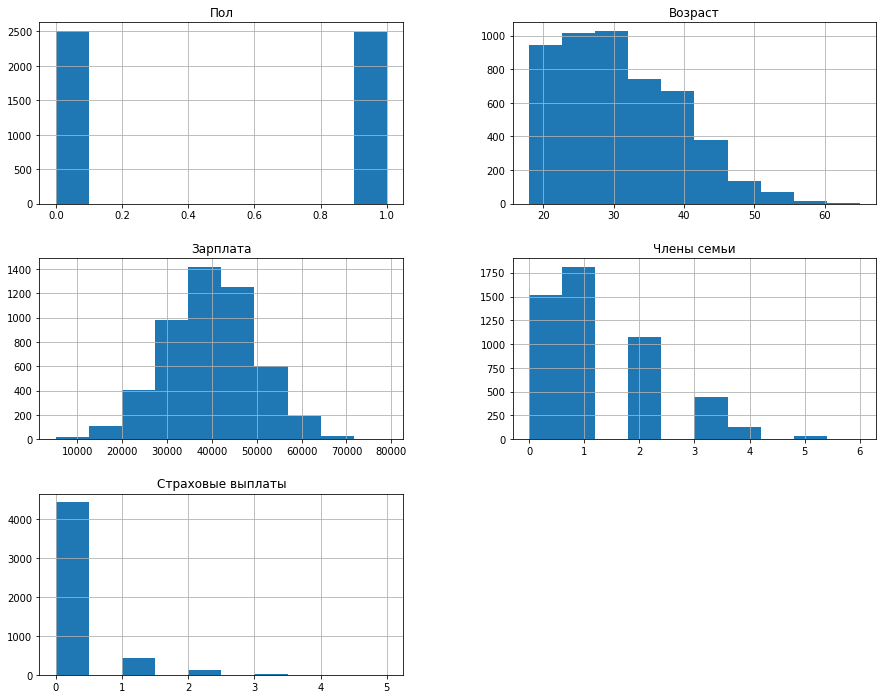

In [5]:
df.hist(figsize=(15,12))

<AxesSubplot:>

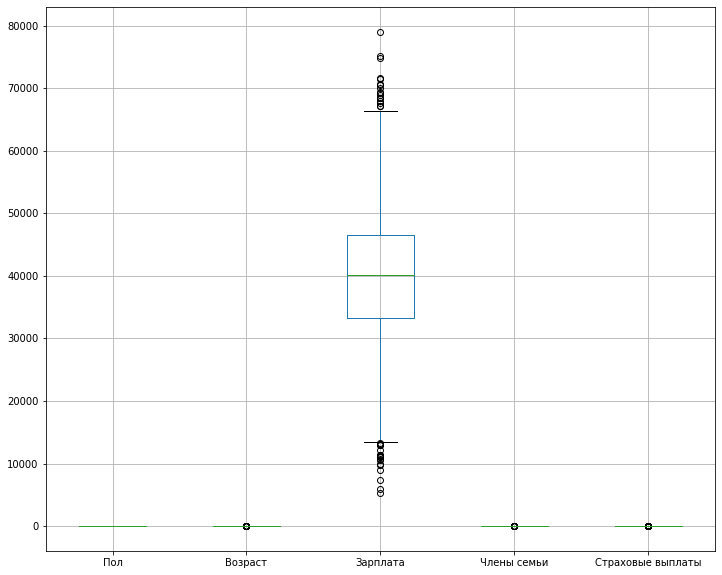

In [6]:
df.boxplot(figsize = (12,10))

## Вывод по первичному изучению данных

Итого, наш датасет состоит из 5000 объектов (строк) и всего 5 признаков (столбцов). Столбец "Страховые выплаты" выступает в роли целевого признака. Содержимое остальных столбцов понятно из их названий и не требует дополнительных пояснений. Пропусков в данных нет, их тип тоже не требует корректировки.
    
Можно двигаться дальше.

## Подготовка признаков, разделение данных 

In [7]:
# Отделяем целевой признак от датесета

features = df.drop('Страховые выплаты', axis = 1)
target = df['Страховые выплаты']

In [8]:
# Делим данные на тренировочную и тестовую выборки

(features_train, features_test, 
 target_train, target_test) = train_test_split(features, 
                                               target, test_size = 0.25, 
                                               random_state=12345)

# Задача про умножение матриц

## Теоретическое обоснование

Формулы к теме "Модель линейной регрессии"

Предсказания (полная версия):

$$
a = Xw'+w0
$$

Предсказания (краткая версия):

$$
a = Xw
$$
Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обозначения:

- $a$ - вектор предсказаний;

- $X$ — матрица признаков (нулевой столбец состоит из единиц);

- $w$ — вектор весов линейной регрессии;

- $w0$ — величина сдвига;

- $w'$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу $w0$);

- $y$ — вектор целевого признака;

- $P$ — матрица, на которую умножаются признаки;



**Ответ:** Если умножать матрицу $X$ на обратимую квадратную матрицу $M$, то качество модели линейной регрессии не изменится. 

**Обоснование:** Модель линейной регрессии совершает предсказания целевого признака путем умножения вектора-объекта (строки в датасете) на вектор параметров модели $w$, которые и предстоит найти. При этом $w$ отвечает за наклон условной линии, которая, если рассматривать двумерное пространство, должна проходить максимально близко по оси $Oy$ ко всем точкам из тренировочного набора (т.е. к  нашим объектам) для выполнения задачи обучения. 

Умножение на матрицу $M$ является введением своего рода коэффициента, который в $M$ раз увеличивает/уменьшает признаки в каждой строке (то есть меняет положение точек по оси $Oy$ относительно искомой прямой на одинаковое для всех объектов расстояние). Таким образом, расстояние от каждой точки до искомой прямой изменится в $M$ раз, но соотношения этих расстояний останутся теми же ((для того, чтобы умножение выполнилось, количество столбцов в обратимой матрице должно соответствовать числу строк в исходной матрице $X$)

Для модели не важно, какие подаются числа, если расстояние между векторами в пропорциональном соотношении остается тем же. Относительная погрешность при этом останется той же.

Таким образом, можно вводить коэффициенты для объектов, которые изменият признаки в таблице, что даст своего рода "зашифровку" данных. Для восстановления же исходников нужно просто в обратном порядке произвести те же действия.

В таком случае, формула обучения примет следующий вид:

$$
w_M = ((XM)^T XM)^{-1} (XM)^T y
$$

А формула предсказания такой:
    
$$
a_M = X_M w_M
$$

1) Пусть новая матрица признаков:
$$
X_P = XP
$$

2) Тогда новый вектор весов будет выглядеть следующим образом:
$$
w_P = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = (P^T\cdot (X^T  X)\cdot  P)^{-1} P^T X^T y = P^{-1} \cdot (X^T  X)^{-1} \cdot (P^T)^{-1}  P^T X^T y =
$$
    
$$
= P^{-1} \cdot (X^T  X)^{-1} \cdot E \cdot X^T y = P^{-1} \cdot (X^T  X)^{-1} \cdot  X^T y
$$
    
То есть
    
$$
w_P = P^{-1} \cdot (X^T  X)^{-1} \cdot  X^T y
$$

3) Заметим, что в текущей формуле можно выявить формулу обучения ($w$). 
$$
w = (X^T X)^{-1} X^T y
$$

Преобразуем.
$$
w_P = P^{-1} w
$$

4) Построим предсказания по формуле для новой матрицы признаков и вектора весов
$$
a_P = X_P w_P = X P P^{-1} w = XEw = Xw
$$

То есть
    
$$
a_P = a
$$
    

</div>

## Практическое доказательство правомерности ответа путем преобразования матриц

In [9]:
# Формируем обратимую матрицу и проверяем ее на наличие обратной

M = np.array([[1, 4, 2, 3],
                 [1, 3, 2, 15],
                 [21, 3, 7, 3],
                 [1, 1, 2, 3]])

try:
    M_INV = np.linalg.inv(M)
    print('Ошибка не выдана. Значит, обратимая матрица к M существует. Ее внешний вид сейчас не так важен!)')
except:
    print('К сожалению, введенная матрица не имеет обратной. Попробуйте поменять значения.')

Ошибка не выдана. Значит, обратимая матрица к M существует. Ее внешний вид сейчас не так важен!)


In [10]:
# Рассчитаем по представленной выше формуле значение вектора w

w = np.linalg.inv(((features).T)@features)@((features).T)@target
w

0   -0.044385
1    0.023336
2   -0.000012
3   -0.045517
dtype: float64

In [11]:
# То же для вектора w_m

w_m = np.linalg.inv((((features@M).T)@features@M))@((features@M).T)@target
w_m

0    0.011545
1    0.000377
2   -0.037232
3    0.005675
dtype: float64

In [12]:
# Теперь умножаем матрицу признаков на вектора w для получения предсказаний

a = np.dot(features,w)
a

array([ 0.28287261,  0.58051347,  0.42948107, ..., -0.02345651,
       -0.05255887,  0.08547465])

In [13]:
# Преобразуем матрицу признаков умножением на обратимую матрицу M, а результат
# домножаем на вектор w_p для получения предсказаний на измененных данных

a_m = np.dot(np.dot(features,M), w_m)
a_m

array([ 0.28287294,  0.58051368,  0.42948103, ..., -0.02345595,
       -0.05255805,  0.085475  ])

In [14]:
# Для сравнения предсказаний рассчитаем среднюю адсолютную ошибку (MAE)

abs(a-a_m).mean()

3.6206165696960335e-07

Полученный результат проверки различия предсказаний на исходных и преобразованных данных представляет собой крайне малое число $(2.42615308680999)^-7$, наличие которого обусловлено накоплением ошибки в ходе машинных вычислений. Таким образом, домножение матрицы признаков на рандомную обратимую матрицу не вносит изменений в получаемые предсказания.

## Практическое доказательство на работе модели линейной регрессии

In [15]:
# Обучаем модель линейной регрессии и делаем предсказания

model = LinearRegression()
model.fit(features_train, target_train)

predictions = model.predict(features_test)

In [16]:
# Умножаем обучающую и тестовую выборки на матрицу M

features_train_encrypted = features_train@M
features_test_encrypted = features_test@M

In [17]:
# Обучаем модель линейной регрессии на новых данных и делаем предсказания

new_model = LinearRegression()
new_model.fit(features_train_encrypted, target_train)

new_predictions = new_model.predict(features_test_encrypted)

In [18]:
# С целью проверки того, что предсказания на исходных и преобразованных данных равны,
# рассчитаем метрику MAE

(abs(predictions-new_predictions)).mean()

7.353354369854514e-13

Полученный результат проверки различия предсказаний на исходных и преобразованных данных представляет собой стремящееся к нулю число $(5.475613740202334)^-13$. Таким образом, еще раз доказано, что домножение матрицы признаков на рандомную обратимую матрицу не вносит изменений в получаемые предсказания.

# Создание и проверка алгоритма зашифровки данных

## Формулирование алгоритма зашифровки признаков

Для изменения до неузнаваемости данных пользователей страховой компании предлагается следующая последовательность действий:
  
   1. Умножение матриц с признаками на обратимую матрицу $М = [[1, 4, 2, 3],
                 [1, 3, 2, 15],
                 [21, 3, 7, 3],
                 [1, 1, 2, 3]]$
                 
   2. Полученные массивы домножаем на коэффициент $K1 =25.1984636$
   3. К результирующей матрице добавляем коэффициент $K2 = 0.578658$
   4. Для усложнения эксперимента домножим отдельно второй столбец датасета с признаками на $K3 = 12.12547$
   
Для расшифровки данных следует провести указанные операции в обратном порядке

## Обучение модели на исходных данных

In [19]:
# Обучаем модель линейной регрессии

model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [20]:
# Осуществляем предсказание целевого признака на тестовой выборке

predictions = model.predict(features_test)

In [21]:
# Рассчитываем метрику R2 для полученной модели

r2_original = r2_score(target_test, predictions)

r2_original

0.43522757127025646

## Преобразование выборки признаков согласно предложенному алгоритму

In [22]:
# Формируем обратимую матрицу 

M = np.array([[1, 4, 2, 3],
                 [1, 3, 2, 15],
                 [21, 3, 7, 3],
                 [1, 1, 2, 3]])

In [23]:
# Проверяем обратимость матрицы М путем нахождения самой обратной матрицы M_INV к ней

M_INV = np.linalg.inv(M)
M_INV

array([[-1.42857143e-02,  3.57142857e-02,  5.71428571e-02,
        -2.21428571e-01],
       [ 3.33333333e-01,  0.00000000e+00,  0.00000000e+00,
        -3.33333333e-01],
       [-7.61904762e-02, -1.42857143e-01, -2.85714286e-02,
         8.19047619e-01],
       [-5.55555556e-02,  8.33333333e-02,  4.33680869e-19,
        -2.77777778e-02]])

In [24]:
# Записываем в отдельную переменную коэффициент K1, K2, K3

K1 =25.1984636

K2 = 0.578658

K3 = 12.12547

In [25]:
# "Зашифровываем" тренировочную и тестовую выборки признаков согласно предложенному алгоритму

features_train_encrypted = features_train@M*K1+K2 
features_test_encrypted = features_test@M*K1+K2

features_train_encrypted[1] = features_train_encrypted[1] * K3
features_test_encrypted[1] = features_test_encrypted[1] * K3

In [26]:
# Выводим полученны выборки для визуального осмотра

print(features_train_encrypted.head()), 
print()
print(features_test_encrypted.head())

                 0             1             2             3
3369  1.915701e+07  3.322294e+07  6.387559e+06  2.752958e+06
1441  3.048094e+07  5.283026e+07  1.016178e+07  4.367222e+06
571   2.174963e+07  3.770312e+07  7.251262e+06  3.119142e+06
225   2.386640e+07  4.137331e+07  7.957020e+06  3.423035e+06
2558  2.677677e+07  4.641233e+07  8.927060e+06  3.837752e+06

                 0             1             2             3
3183  2.063847e+07  3.578003e+07  6.881046e+06  2.960996e+06
1071  2.280844e+07  3.955319e+07  7.604998e+06  3.277212e+06
2640  2.227897e+07  3.862709e+07  7.428004e+06  3.197383e+06
2282  1.841554e+07  3.191705e+07  6.139354e+06  2.638280e+06
1595  2.116784e+07  3.670400e+07  7.057838e+06  3.039616e+06


## Обучение модели на зашифрованной выборке

In [27]:
# Обучаем модель линейной регрессии на "зашифрованных" данных

new_model = LinearRegression()
new_model.fit(features_train_encrypted, target_train)


LinearRegression()

In [28]:
# Создаем список с предсказаниями на зашифрованных тестовых данных

new_predictions = new_model.predict(features_test_encrypted)

In [29]:
# Рассчитываем метрику R2

r2_encrypted = r2_score(target_test, new_predictions)

r2_encrypted

0.4352275712694287

In [30]:
# Для наглядности сравнения метрик R2 до зашифровки и после рассчитаем их отношение

r2_original / r2_encrypted

1.000000000001902

## Итоговая таблица

In [31]:
# Для наглядности представления результатов составим итоговую таблицу

final_chart = pd.DataFrame({'Состояние данных': ['Исходные', 'Зашифрованные'],
                           'Метрика R2': [r2_original, r2_encrypted]})

In [32]:
final_chart

,Состояние данных,Метрика R2
0,Исходные,0.435228
1,Зашифрованные,0.435228


Исходные данные после зашифровки полностью изменили свой вид. Теперь без "ключа" невозможно понять, какие сведения что обозначают. При этом значение метрики R2 осталось тем же (r2_original = 0.435227571270266, r2_encrypted = 0.435227571270153), это подтверждает их отношение, равное 1.0000000000002598. Отличие в последних знаках после запятой обусловлено погрешностью вычислений машины.

# Вывод по проекту

В данной работе ставилась задача теоретического обоснования и практической проверки возможности зашифровки личных данных клиентов страховой компании путем умножения датасета на обратимую матрицу. При этом качество работы моделей линейной регрессии, обучаемой на незашифрованных и зашифрованных данных, не должно отличаться.
    
В ходе работы были отработаны навыки использования базовых библиотек языка Python, загрузки и изучения выборки данных, разбиения ее на обучающую и тестовую части. 

Дано обоснование возможности зашифровки данных обозначенным методом, предложен и реализован конкретный алгоритм такого кодирования. При этом метрика R2, используемая в данной задаче для проверки качества работы моделей линейной регрессии, не претерпела значительных изменений (r2_original = 0.435228, r2_encrypted = 0.435228).